#        ОПРЕДЕЛЕНИЕ ЗАКОНОМЕРНОСТЕЙ, ОПРЕДЕЛЯЮЩИХ УСПЕШНОСТЬ КОМПЬЮТЕРНЫХ ИГР 
 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования :**
Выявить определяющие успешность игры закономерности

**Ход исследования :**

Данные о продажах игр- в файле : /datasets/games.csv

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в пять этапов:

1. Обзор данных.

2. Предобработка данных.

3. Исследовательский анализ данных.

- Самые популярные платформы (топ-5)
- Анализ количества выпущенных игр за разные годы.
- Динамика продаж по платформам.
- Определение актуального периода для построения прогноза на 2017 год.
- Анализ платформ - лидеров по продажам, потенциальной прибыльности.
- Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
- Общее распределение игр по жанрам.
4. Портрет пользователя каждого региона

• Самые популярные платформы (топ-5).

• Самые популярные жанры (топ-5).

• Влияние рейтинга ESRB на продажи в отдельном регионе

5. Проверка гипотез:

• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

• Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 1. Откроим файл с данными и изучим общую информацию**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as pn

In [143]:
games= pd.read_csv('/datasets/games.csv')

In [144]:
# Получение общей информации датасета
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [145]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [146]:
# проверим количество пропусков в датасете
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [147]:
# проверим количество дубликатов в датасете
games.duplicated().sum()

0

**После изучения общей информации мы видим:**

1.Есть пропущенные значения в столбцах Name,Year_of_Release,Critic_Score,User_Score,Rating.

2.Названия стобцов необходимо привести к нижнему регистру.

3.Преобразовать данные в нужные типы.

4.Проверили наши данные на наличие дубликатов,дубликаты отсутствуют.

**Шаг 2. Подготовим данные**

In [148]:
#Заменим названия столбцов (приведем к нижнему регистру)
games.columns = games.columns.str.lower()
games.head() # проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [149]:
#Посмотрим на пропуски в столбце name
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видим таких пропусков всего два, также по ним отсутствуют данные
в столбцах genre,critic_score,user_score и rating.
Поэтому можно удалить эти две строки.

In [150]:
games = games.dropna(subset=['name'])

In [151]:
#Посмотрим на пропуски в столбце year_of_release
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропущенных строк 269 из 16715 это около 2%.Для анализа такая характеристика как год выпуска является одной из основных и среди значений не должно быть неизвестных (пропущенных), но у нас нет возможности по другим параментрам определить год выпуска, поэтому эти строки удалим.

In [152]:
games = games.dropna(subset=['year_of_release'])

In [153]:
#Изменим тип данных в столбце year_of_release на целочисленный
games['year_of_release'] = games['year_of_release'].astype('int')

In [154]:
#Посмотрим на пропуски в столбце user_score
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много, удалить их мы не можем, поэтому оставим пропуски в столбце user_score , их заполнение каким-либо значением может исказить наши результаты. Они могут быть связаны с тем, что возможно раньше игры не оценивались пользователями,так как не было сервисов, которые собирали бы рейтинги игроков. Было бы неправильно заполнить пропуски  средним или медианой. 

In [155]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков в столбце user_score встречается абривиатура tbd,что означает "To Be Determined", то есть "Будет определено".
Данное сокращение может принимать разнообразные формы, но чаще всего оно используется для обозначения неизвестной даты выхода. Также эта аббревиатура может быть использована и в случае с уже вышедшей игрой, поэтому можно увидеть tbd и в отношении уже вышедших в свет игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено.  Так как оценки пользователей стоят от 0 до 10, то заменим значения tbd на заглушку -1.

In [156]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

In [157]:
#Изменим тип данных в столбце user_score на float
games['user_score'] = games['user_score'].astype('float')

In [158]:
games['user_score'].unique()

array([ 8. ,  nan,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [159]:
#Посмотрим на пропуски в столбце critic_score
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много, удалить их мы не можем,поэтому оставим пропуски в столбце critic_score их заполнение каким-либо значением может исказить наши результаты. Причины их появления, возможно те же, что и у пользователей это отсутствие сервисов, которые собирали бы оценки критиков или на тот момент не было в этом необходимости. Было бы неправильно заполнить пропуски  средним или медианой. 

In [160]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [161]:
# Посмотрим на пропуски в столбце rating
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видим в  большинстве случаев, пропущены одновременно и рейтинг, оценка критиков и оценка пользователей. Они связаны, вероятно, с тем, что не каждая игра попадала на международный рынок и соответственно в международный рейтинг,возможно также  игры была создана в другой стране (не только в США или Канаде). Пропусков слишком много, удалить их нельзя, определить рейтинг игр по текущим параметрам таблицы невозможно, поэтому заменим их на Unknown.

In [162]:
# заменим пропуски на Unknown
games['rating'] = games['rating'].fillna('Unknown')
games['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Видно, что 4 вида рейтинга встречаются часто: Е, Т, М и Е10+, а 4 встречаются очень редко.
Их можно заменить(согласно рейтингу игр ESRB):

EC (для детей младшего возраста) на E (для всех)

K-A (для взрослых и детей) на E (для всех)

RP (рейтинг ожидается) на Unknown

AO (только для взрослых) на M (для взрослых)

In [163]:
games.loc[games['rating'].isin(['EC', 'K-A']), 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = 'Unknown'
games.loc[games['rating'] == 'AO', 'rating'] = 'M'

In [164]:
#проверим полученные результаты
games['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

Значения столбца rating являются категориальными и обозначают рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде (ESRB). Компания была создана в 1994, а это может значить , что игры до 1994 скорее всего не имеют рейтинга, проверим это

In [165]:
games[games['year_of_release']<1994].isna().sum()


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       362
user_score         362
rating               0
dtype: int64

In [166]:
# посмотрим на наши данные после обработки
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитайтаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales

In [167]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

**Вывод:**


На втором шаге мы провели предобработку данных.Данные были преобразованы для дальнейшего использования, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на значение (-1), также были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'.
Причины возникновения пропущенных значений могут быть самыми различными: практически неизвестная игра, о которой нет информации в открытом доступе или игра не имеет рейтинга (ESRB) по причине создания игры в иной стране (не только в США или Канаде) и другие.


**Шаг 3. Проведем исследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

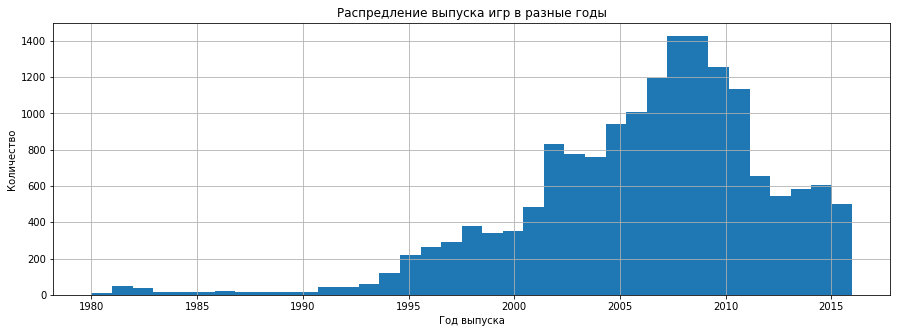

In [168]:
# Построим график зависимости количества игр от года выпуска
games['year_of_release'].plot(kind='hist', figsize = (15, 5), grid=True, bins=37, title='Распредление выпуска игр в разные годы');
plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По графику можно увидеть, что количество игр увеличивалось с каждым годом до 2010, затем произошел небольшой спад, и, начиная с 2015 вновь подъем.
До 1995 года количество выпускаемых игр не превышало 200 игр в год. Причины этого в том, что в то время индустрия компьютерных игр только появилась и начала развиваться.
Таким образом, актуальными будут являтся данные за прошедшие 10 лет, которые отражают как взлет, так и падение количества игр.


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой срок появляются новые и исчезают старые платформы?

In [169]:
platform_name=games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
platform_name.head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Для нашего дальнейшего исследования возьмем первые 6 платформ с наибольшими суммарными продажами (PS2,X360,PS3,Wii,DS и PS) и построим распределение по годам.

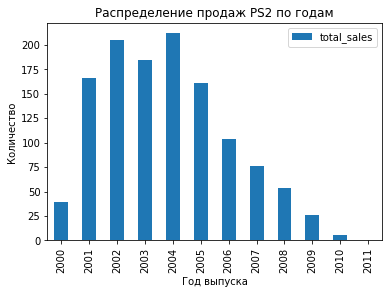

In [170]:

games.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж PS2 по годам')
plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По платформе PS2 пик продаж наблюдался в период 2001-2005гг., затем следует спад, в 2011г. продажи прекратились, в настоящее время платформа не актуальна.

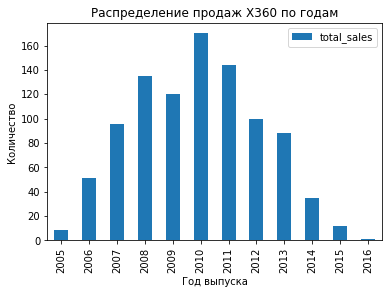

In [171]:

games.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж X360 по годам'),plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По платформе X360 продажи стартовали с 2005г, пик продаж наблюдался в период 2008-2011гг., затем следует спад. Как видно по графику, с 2016г. и по настоящее время платформа не актуальна.

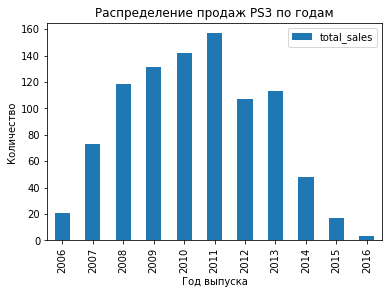

In [172]:

games.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж PS3 по годам'),plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По платформе PS3 продажи стартовали с 2006г, пик продаж наблюдался в период 2009-2011гг., затем следует спад. В 2015-2016гг. продажи данной платформы имеют минимальные значения.

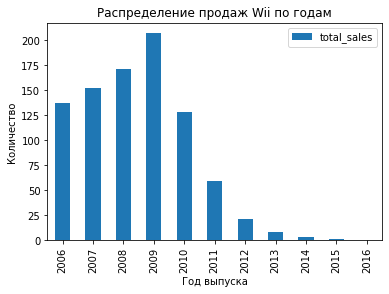

In [173]:

games.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж Wii по годам'),plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По платформе Wii продажи начались в 2006г.,как видим продажи быстро  росли и достигли своего максимума в 2008-2009, затем следует спад, в 2014-2015г. продажи практически прекратились, в настоящее время платформа не актуальна.

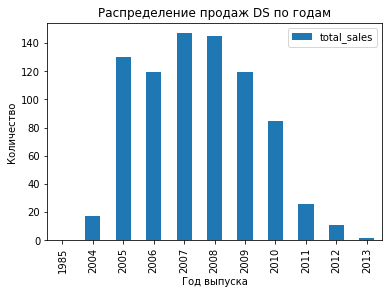

In [174]:

games.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж DS по годам'),plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

По платформе DS продажи начались в 2004г.,они очень быстро достигли своего максимума в 2005-2008 гг., затем следует спад, в 2013 г. продажи практически прекратились, в настоящее время платформа не актуальна.

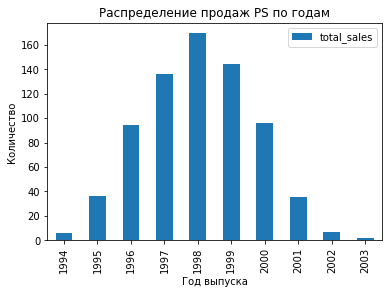

In [175]:

games.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')
plt.title('Распределение продаж PS по годам'),plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

Данная платформа PS самая "старая" из рассматриваемых, продажи начались в 1994г., своего максимума достигли в 1997-1999гг., затем идет спад продаж, в 2003 г. продажи практически прекратились, в настоящее время платформа не актуальна.

**После анализа 6 платформ с максимальными продажами можно сделать следующие выводы:**

1. Нет платформ с самыми высокими суммарными продажами до 1994 года. 
2. При появлении новой платформы жизненный цикл ее составляет около 10 лет, а пик популярности приходится примерно на половине этого срока.
3. По графикам хорошо видно плавное изменение продаж платформ PS, PS2 и PS3 - при выпуске новой версии у старой происходил быстрый спад. Вероятнее всего, на пике продаж выходила новость о создании следующей версии платформы и пользователи переставали покупать старую версию или распродавали ее и ждали выхода новой. 

**Определение актуального периода данных для анализа**

Определим период данных, который поможет построить прогноз на 2017 год, учитывая результаты изучения данный на Шаге 3.

По его результатам можно сказать, что:

- не стоит брать период более 10 лет
- с 2009 до 2011 гг. есть спад продаж игр (предположительно так повлиял кризис 2008 года)

Примем за актуальный период: 2012-2016 гг., так как рынок игр меняется очень быстро и не стоит брать более поздние года. 

In [176]:
games= games.query('year_of_release >= 2012')

Посмотри какие платформы лидируют по продажам, растут или падают?

In [177]:
pd.pivot_table(games, index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


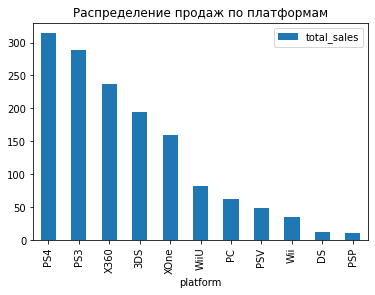

In [210]:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)\
.plot(kind='bar')
plt.title('Распределение продаж по платформам')
plt.show()

Посмотрим на график суммарных продаж каждой платформы:

PS3 имеел замечательные продажи в 2012-2013 гг. (107-113 млн копий), но затем падают вниз, по причине выхода новой версии платформы: PS4 в 2013, продажи которой начиная с 2013 растут со 100-120 млн копий в 2015 году.

X360 имеел хорошие продажи до 2013 г. около 100 млн. копий, но затем продажи идут на спад по причине выхода новой версии XOne.
XOne имеет рост, начиная с 2013 г.(20 млн. копий), и уходит на спад, начиная с 2016 года.

3DS имеет хорошие продажи в 2012 г (50 млн.) и 2013 г.(57 млн.), но начиная с 2014г. продажи постепенно падают вниз.

К 2016 продажи игр на всех платфомах идет на спад, это может быть связано с тем, что в мире стали меньше интересоваться играми и спрос на них падает.

Таким образом, потенциально прибыльными можно считать: PS4, PS3, X360, 3DS, XOne


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

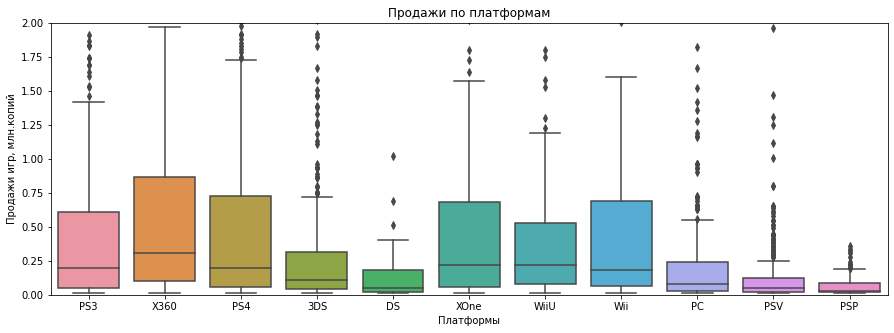

In [179]:

plt.figure(figsize=(15,5))
sns.boxplot(data=games, x='platform', y='total_sales').\
    set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн.копий', ylim=(0,2))
plt.show()

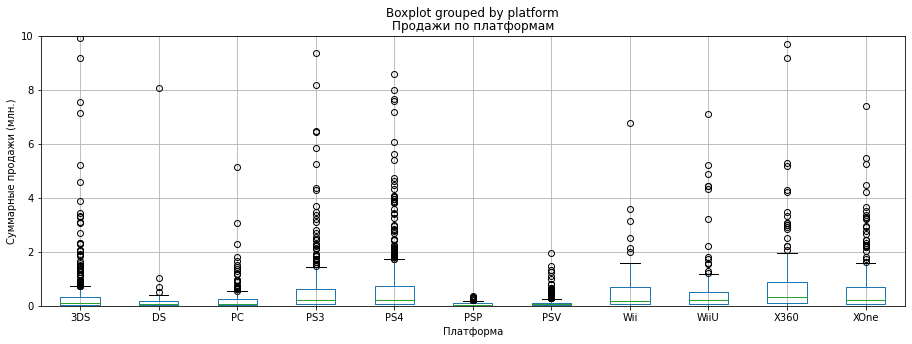

In [180]:
games.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.title('Продажи по платформам');
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 10)
plt.show()

Графики "ящик с усами" позволяет наглядно увидеть основные характеристики данных (медиана, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы).Медиана на всех платформах находится ближе к нижнему квантилю и у топ-5 платформ находится приблизительно на одном уровне.
также можно сказать,что с выходом новой версии платформы продажи старой версии начинают падать. 
Например,можно сказать, что сначала преобладала популярность игр на PS3 , а при выходе новой версии  стала преобладать популярность PS4, с появлением 3DS продажи DS уменьшились.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Выберем в качестве одной из популярной платформ PS4 и построим диаграмму рассеяния, а также посчитаем корреляцию между отзывами и продажами

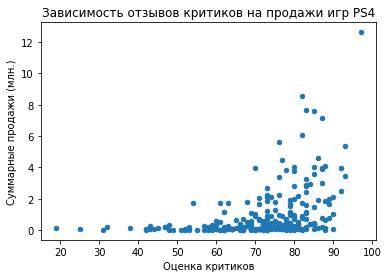

In [181]:
#Построим диаграмму рассеяния
games_ps4 = games.query('platform == "PS4"')
games_ps4.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр PS4');

In [182]:

print('Коэффициент корреляции =', games_ps4['total_sales'].corr(games_ps4['critic_score']))

Коэффициент корреляции = 0.406567902061781


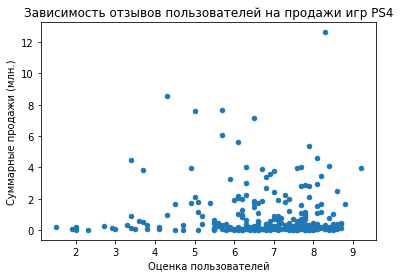

In [183]:
games_ps4 = games.query('platform == "PS4"')
games_ps4[games_ps4['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр PS4');

In [184]:

print('Коэффициент корреляции =', games_ps4['total_sales'].corr(games_ps4['user_score'] != -1))

Коэффициент корреляции = 0.06034783919064639


Влияние оценки критиков на продажи есть, но совсем незначительное (коэффициент корреляции равен 0.41). В то время как влияние отзывов пользователей на продажи практически нет (коэффициент корреляции равен 0.06).

Соотнесем предыдущие выводы с продажами игр на других платформах, возьмем для сравнения другие платформы из топ-5(XOne,X360,PS3,Wiiu):

Коэффициент корреляции = 0.41699832800840175


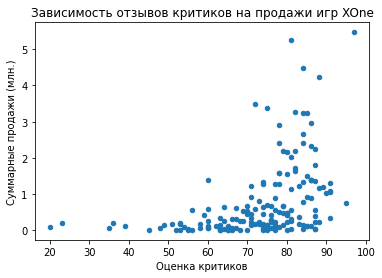

In [186]:
games_xone = games.query('platform == "XOne"')
games_xone.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр XOne');
print('Коэффициент корреляции =', games_xone['total_sales'].corr(games_xone['critic_score']))

Коэффициент корреляции = 0.12423245373710581


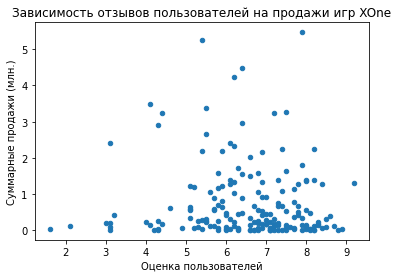

In [187]:
games_xone = games.query('platform == "XOne"')
games_xone[games_xone['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр XOne');
print('Коэффициент корреляции =', games_xone['total_sales'].corr(games_xone['user_score'] != -1))

Влияние оценки критиков на продажи есть, но совсем незначительное (коэффициент корреляции равен 0.42). В то время как влияние отзывов пользователей на продажи практически нет (коэффициент корреляции равен 0.12).

Коэффициент корреляции = 0.36057348885073365


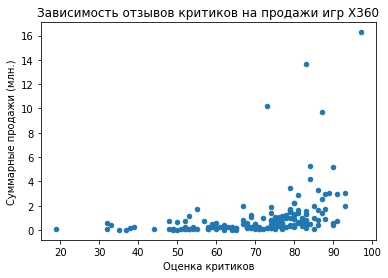

In [188]:
games_x360 = games.query('platform == "X360"')
games_x360.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр X360');
print('Коэффициент корреляции =', games_x360['total_sales'].corr(games_x360['critic_score']))

Коэффициент корреляции = 0.07756861043884686


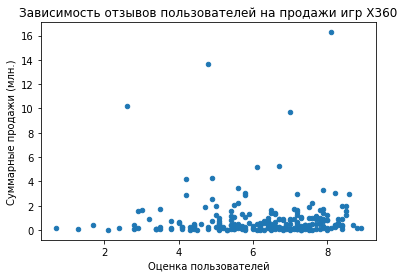

In [189]:
games_x360 = games.query('platform == "X360"')
games_x360[games_x360['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр X360');
print('Коэффициент корреляции =', games_x360['total_sales'].corr(games_x360['user_score'] != -1))

Влияние оценки критиков на продажи есть, но совсем незначительное (коэффициент корреляции равен 0.36). В то время как влияние отзывов пользователей на продажи практически нет (коэффициент корреляции равен 0.08).

Коэффициент корреляции = 0.3314972592629587


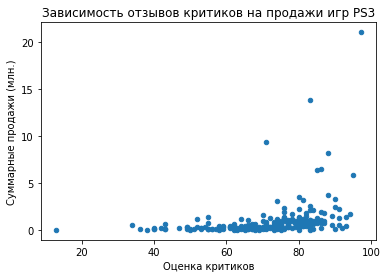

In [190]:
games_ps3 = games.query('platform == "PS3"')
games_ps3.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр PS3');
print('Коэффициент корреляции =', games_ps3['total_sales'].corr(games_ps3['critic_score']))

Коэффициент корреляции = 0.08588674084935291


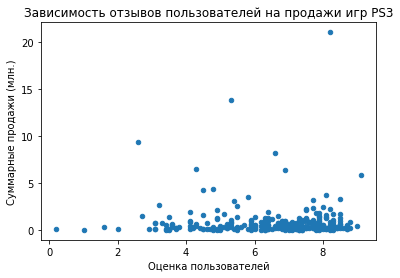

In [191]:
games_ps3 = games.query('platform == "PS3"')
games_ps3[games_ps3['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр PS3');
print('Коэффициент корреляции =', games_ps3['total_sales'].corr(games_ps3['user_score'] != -1))

Влияние оценки критиков на продажи есть, но совсем незначительное (коэффициент корреляции равен 0.33). В то время как влияние отзывов пользователей на продажи практически нет (коэффициент корреляции равен 0.09).

Коэффициент корреляции = 0.32080286953607845


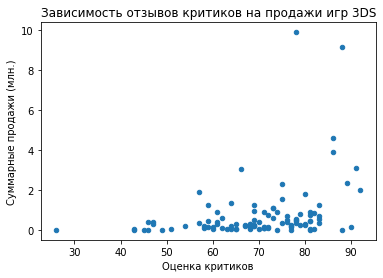

In [192]:
games_3ds = games.query('platform == "3DS"')
games_3ds.plot(x='critic_score', y='total_sales', kind='scatter');
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка критиков'), plt.title('Зависимость отзывов критиков на продажи игр 3DS');
print('Коэффициент корреляции =', games_3ds['total_sales'].corr(games_3ds['critic_score']))

Коэффициент корреляции = 0.08642078903461929


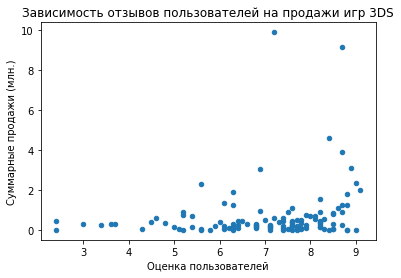

In [193]:
games_3ds = games.query('platform == "3DS"')

games_3ds[games_3ds['user_score'] != -1].plot(kind='scatter', x='user_score', y='total_sales')
plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Зависимость отзывов пользователей на продажи игр 3DS');
print('Коэффициент корреляции =', games_3ds['total_sales'].corr(games_3ds['user_score'] != -1))

Влияние оценки критиков и пользователей на продажи очень слабое, коэффициенты корреляции 0.32 и 0.09 соответственно.

**Вывод:**

Из построенных выше диаграмм рассеяния и расчета коэффициентов корреляции по каждой платформе между отзывами и продажами видно, что у всех потенциально прибыльных платформах примерно равные значения коэффициентов корреляции зависимости отзывов критиков на продажи от 0.33 до 0.41 такие значения показывают нам слабое или очень слабое влияние на продажи. Что касается отзывов пользователей, то они  очень слабо влияют на продажи для потенциально прибыльных платформ, так коэффициенты корреляции имеет значения 0.06-0.12

Посмотрим на общее распределение игр по жанрам

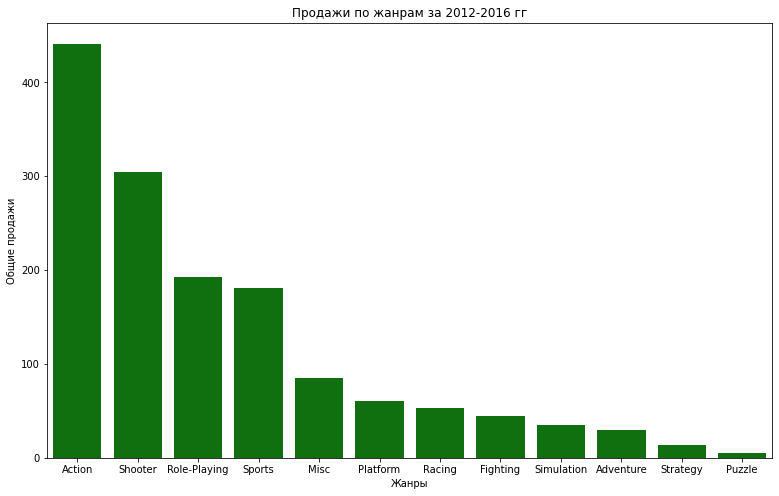

In [195]:

plt.figure(figsize=(13, 8))
top_sales_platform = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
(sns.barplot(data = top_sales_platform, x = top_sales_platform.index, y = 'total_sales', color = 'green')
    .set(title = 'Продажи по жанрам за 2012-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()

In [196]:
games.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


**Вывод:**

Из графика видно, что самыми популярными жанрами являются Action (продажи более 440 млн),Shooter (около 305 млн), Role-Playing (около 193 млн),Sports (более 181 млн), далее следуют менее популярные жанры с суммарными продажами от 80 млн. и ниже это Misc,Platform,Racing.

In [197]:
games.pivot_table(index = 'genre', values = ['total_sales'],aggfunc = ['sum', 'median'])

,sum,median
,total_sales,total_sales
genre,,
Action,441.12,0.120
Adventure,29.43,0.030
Fighting,44.49,0.130
Misc,85.04,0.120
Platform,61.00,0.210
Puzzle,4.89,0.045
Racing,53.50,0.140
Role-Playing,192.80,0.140


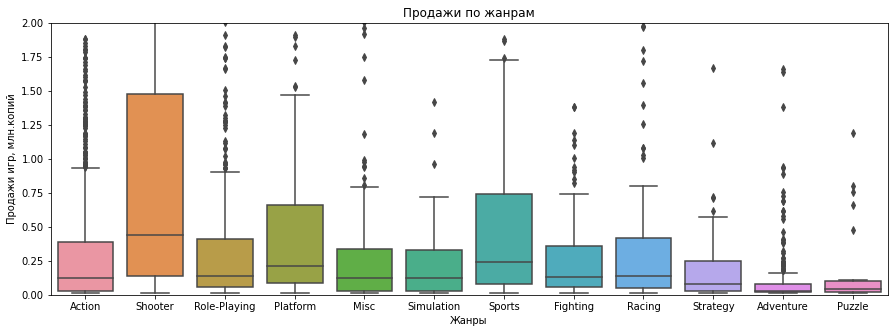

In [198]:
plt.figure(figsize=(15,5))
sns.boxplot(data=games, x='genre', y='total_sales').\
    set(title='Продажи по жанрам', xlabel='Жанры', ylabel='Продажи игр, млн.копий', ylim=(0,2))
plt.show()

Посмотрели на распределение по жанрам и хотя по сумме продаж лидирует жанр Action (441 млн.копий), но если посмотреть на медианные продажи и на диаграмму размаха, то мы видим, что лидерами являются жанры Shooter (0.440),Sports(0.240),Platform(0.210).

**Шаг 4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим для пользователей каждого региона (NA, EU, JP) самые популярные платформы (топ-5)

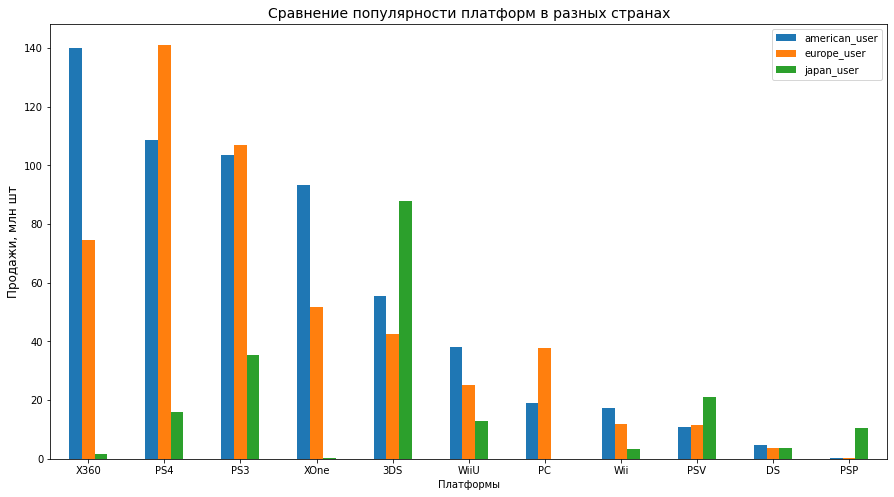

In [199]:
# сумма проданных копий для Северной Америки по платформам
na_platf = games.groupby('platform')['na_sales'].agg('sum')
# сумма проданных копий для Европы по платформам
eu_platf = games.groupby('platform')['eu_sales'].agg('sum')
# сумма проданных копий для Японии по платформам
jp_platf = games.groupby('platform')['jp_sales'].agg('sum')
# объединяем Series
users_platf = pd.concat([na_platf, eu_platf, jp_platf], axis=1).reset_index()
users_platf.columns = ['platform', 'american_user', 'europe_user', 'japan_user']
users_platf = users_platf.sort_values(by='american_user', ascending=False)
# строим графики
users_platf.plot.bar(x="platform", rot=0, figsize =(15, 8))
plt.title('Сравнение популярности платформ в разных странах', fontsize=14)
plt.xlabel('Платформы', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()


Посчитаем доли продаж самых популярных платформ:

In [200]:
top_platform = games.groupby('platform').agg({'na_sales':'sum','eu_sales': 'sum','jp_sales':'sum'})\
.sort_values(by='na_sales', ascending = False).round().reset_index()

In [201]:
top_platform['prop_na_sales'] = top_platform['na_sales'] / top_platform['na_sales'].sum() 
top_platform['prop_eu_sales'] = top_platform['eu_sales'] / top_platform['eu_sales'].sum() 
top_platform['prop_jp_sales'] = top_platform['jp_sales'] / top_platform['jp_sales'].sum()
top_platform = top_platform[['platform', 'na_sales', 'prop_na_sales', 'eu_sales', 'prop_eu_sales', 'jp_sales', 'prop_jp_sales']]


In [202]:
top_platform

,platform,na_sales,prop_na_sales,eu_sales,prop_eu_sales,jp_sales,prop_jp_sales
0,X360,140.0,0.237288,75.0,0.147638,2.0,0.010417
1,PS4,109.0,0.184746,141.0,0.277559,16.0,0.083333
2,PS3,103.0,0.174576,107.0,0.210630,35.0,0.182292
3,XOne,93.0,0.157627,52.0,0.102362,0.0,0.000000
4,3DS,55.0,0.093220,43.0,0.084646,88.0,0.458333
5,WiiU,38.0,0.064407,25.0,0.049213,13.0,0.067708
6,PC,19.0,0.032203,38.0,0.074803,0.0,0.000000
7,Wii,17.0,0.028814,12.0,0.023622,3.0,0.015625
8,PSV,11.0,0.018644,11.0,0.021654,21.0,0.109375
9,DS,5.0,0.008475,4.0,0.007874,4.0,0.020833


**Из графика видно:**

Для пользователей Северной Америки самыми популярными топ-5 платформами являются X360 ( 140 млн. шт), PS4 (109 млн. шт), PS3 (103 млн. шт), XOne(93 млн. шт),3DS(55 млн. шт.)

У них же и самые высокие доли продаж: Х360 - 0.25, PS4 - 0.18, PS3 - 0.17, XOne - 0.16, 3DS - 0.09

Для пользователей Европы самыми популярными платформами являются PS4 (141 млн. шт), PS3(107 млн. шт), X360(75 млн. шт), XOne (52 млн. шт),3DS (43 млн. шт)

Их доли продаж составляют: PS4 - 0.28, PS3 - 0.21, X360 - 0.15, XOne - 0.10, 3DS - 0.08

Для пользователей Японии самыми популярными платформами являются 3DS (88 млн. шт), PS3 ( 35 млн. шт), PSV (21 млн.шт), PS4 (16 млн.шт) и WiiU (13 млн.шт).

Доля продаж составляет: 3DS - 0.46, PS3 - 0.18, PSV - 0.11, PS4 - 0.08, WiiU - 0.07

Топ-5 популярных платформ в Северной Америке и Европе примерно одинаков , но в Японии сильно отличается от остальных. Это может быть связано с другой культурой страны и другими предпочтениями у населения. 

Найдем самые популярные жанры (топ-5)

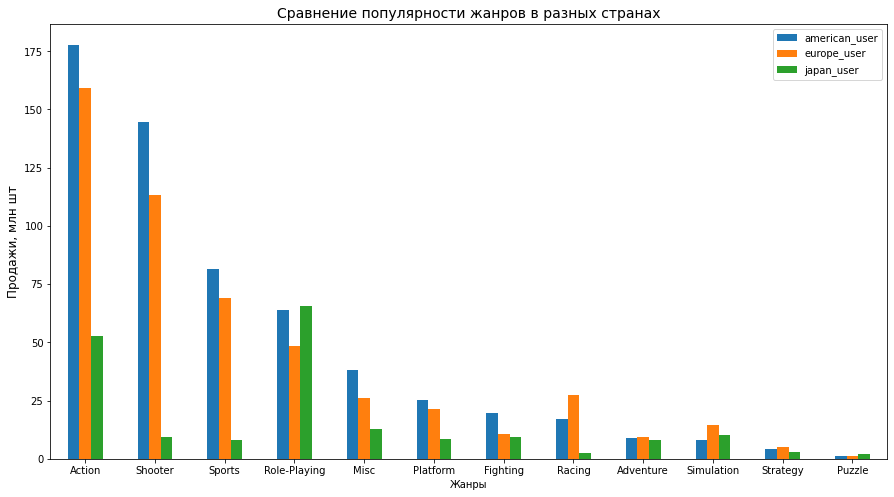

In [203]:
# сумма проданных копий для Северной Америки по жанрам
na_genre = games.groupby('genre')['na_sales'].agg('sum')
# сумма проданных копий для Европы по жанрам
eu_genre = games.groupby('genre')['eu_sales'].agg('sum')
# сумма проданных копий для Японии по жанрам
jp_genre = games.groupby('genre')['jp_sales'].agg('sum')
# объединяем Series
users_genre = pd.concat([na_genre, eu_genre, jp_genre], axis=1).reset_index()
users_genre.columns = ['genre', 'american_user', 'europe_user', 'japan_user']
users_genre = users_genre.sort_values(by='american_user', ascending=False)
# строим графики
users_genre.plot.bar(x="genre", rot=0, figsize =(15, 8))
plt.title('Сравнение популярности жанров в разных странах', fontsize=14)
plt.xlabel('Жанры', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

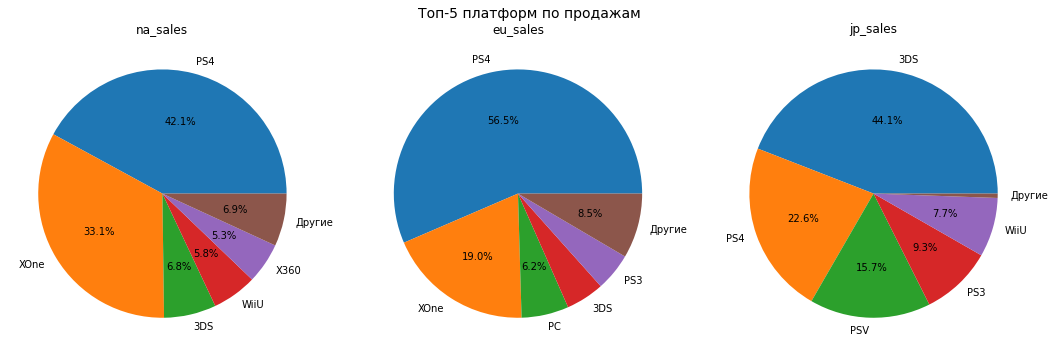

In [204]:
regions_sales=['na_sales','eu_sales','jp_sales']
fig,ax = plt.subplots(1,len(regions_sales),figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = games.query('year_of_release > 2014').groupby('platform').agg({region:'sum'}).sort_values(by=region,ascending=False).reset_index()    
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x>5 else None)
    ax[i].set_title(region)
plt.suptitle('Топ-5 платформ по продажам',fontsize=14)
plt.tight_layout()
plt.show()


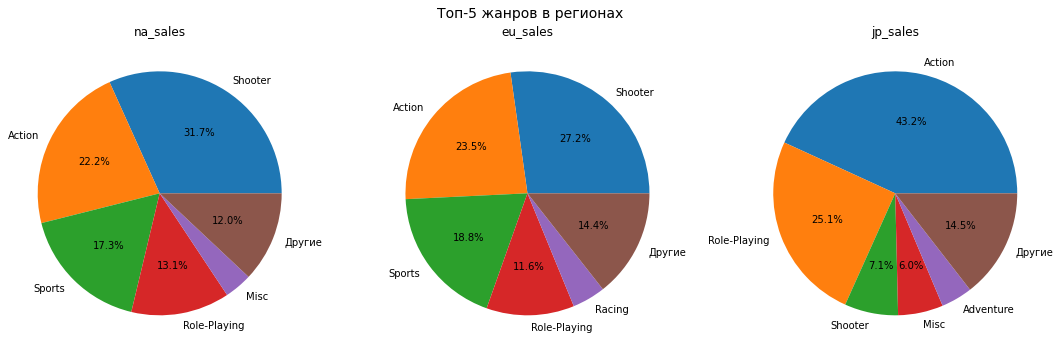

In [205]:
regions_sales=['na_sales','eu_sales','jp_sales']
fig,ax = plt.subplots(1,len(regions_sales),figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = games.query('year_of_release > 2014').groupby('genre').agg({region:'sum'}).sort_values(by=region,ascending=False).reset_index()    
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)
    ax[i].pie(region_top_platform[region], labels=region_top_platform['genre'], autopct=lambda x: f'{x:.1f}%' if x>5 else None)
    ax[i].set_title(region)
plt.suptitle('Топ-5 жанров в регионах',fontsize=14)
plt.tight_layout()
plt.show()

Как видим из графиков топ-5 популярных жанов в Северной Америке и Европе примерно одинаков это: Shooter(27-32 %), Action(22-23%), Sports(17-18%), Role-Playing(12-13%), другие (12-14%)

В Японии топ-5 жанров отличается: Action(43%), Role-Playing(25%), другие(15%), Shooter(7%), Misc(6%).

Это, как и в случае с платформами, может быть связано с другой культурой страны и другими предпочтениями у населения. 

Определим влияние рейтинга ESRB на продажи в отдельном регионе.

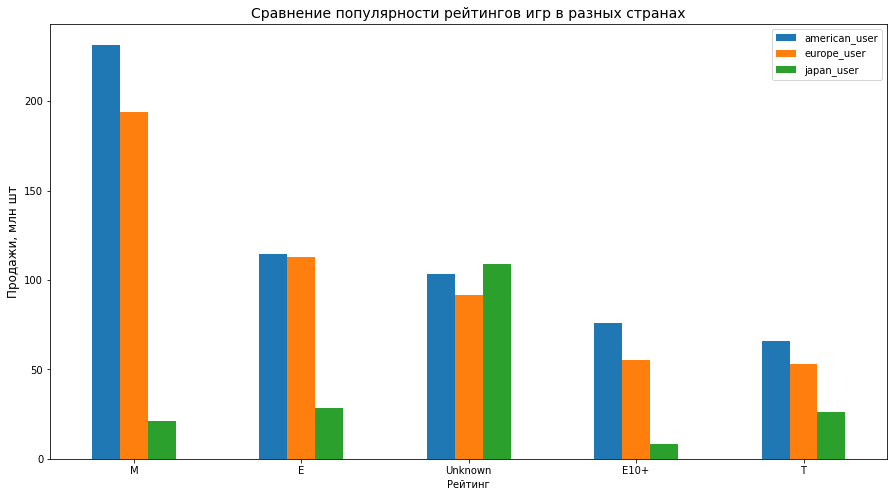

In [206]:
# сумма проданных копий для Северной Америки по рейтингу
na_rating = games.groupby('rating')['na_sales'].agg('sum')
# сумма проданных копий для Европы по рейтингу
eu_rating = games.groupby('rating')['eu_sales'].agg('sum')
# сумма проданных копий для Японии по рейтингу
jp_rating = games.groupby('rating')['jp_sales'].agg('sum')
# объединяем Series 
users_rat = pd.concat([na_rating, eu_rating, jp_rating], axis=1).reset_index()
users_rat.columns = ['rating', 'american_user', 'europe_user', 'japan_user']
users_rat = users_rat.sort_values(by='american_user', ascending=False)
users_rat 
# строим графики
users_rat.plot.bar(x="rating", rot=0, figsize =(15, 8))
plt.title('Сравнение популярности рейтингов игр в разных странах', fontsize=14)
plt.xlabel('Рейтинг', fontsize=10)
plt.ylabel('Продажи, млн шт',fontsize=12)
plt.show()

**Из графика видно:**

Для пользователей Америки и Европы самые популярные игры с рейтингом M (250 и 200 млн. шт соответственно), затем следуют игры c рейтингом E ( более 100 млн. шт), далее соответственно с рейтингом Unknown (около 100 млн.шт). Можно сказать, что в Америке и Европе пользователи отдают предпочтение играм с одним и тем же рейтингом.

Для пользователей Японии совсем иная картина влияния рейтингов игр на продажи. Самыми популярными являются игры с рейтингом Unknown (более 100 млн. шт), затем с рейтингом E и T (около 25 млн.шт). Также хотела отметить, что в Японии возрастными рейтингами игр занимается компания CERO, и как пишут, правила CERO невероятно строги и распространяются только на японский рынок.

**Выводы:**

Портрет пользователя Северной Америки:

- популярные платформы: PS4,XOne,
- популярные жанры игр:Shooter,Action,Sports
- преобладают игры рейтинга M(для взрослых)

Портрет пользователя Европы:

- популярные платформы: PS4, XOne
- популярные жанры игр: Shooter,Action, Sports
- преобладают игры рейтинга M (для взрослых) 

Портрет пользователя Японии:

- популярные платформы:3DS, PS4,PSV
- популярные жанры игр: Action,Role-Playing
- преобладают игры рейтинга Unknown (рейтинг неизвестен) 

**Шаг 5. Проверим гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Начнём проверку с формулировки нулевой гипотезы H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, тогда альтернативной гипотезой H1 будет- cредние пользовательские рейтинги платформ Xbox One и PC различаются

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей,  используем t-критерий Стьюдента ,применим метод scipy.stats.ttest_ind(), посчитаем значенте p-value(это вероятность получить для нашей задачи распределение случайной величины как и при условии, что нулевая гипотеза верна)

Порог значимости alpha = 0.05, он  устанавливается обычно на уровне 0,05 или 0,01. Выбор его значения определяется поставленной задачей.


In [207]:
games= games.query('year_of_release >= 2012')
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

alpha = 0.05 # задаем порог значимости
results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, значит cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров Action и Sports  разные.

Нулевой гиротезой будет H0 - cредние пользовательские рейтинги жанров Action и Sports одинаковые, альтернативной гипотезой H1 будет - cредние пользовательские рейтинги жанров Action и Sports разные.

In [208]:

action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

alpha = 0.05 # задаем порог значимости
results = st.ttest_ind(action_ratings,pc_ratings, equal_var=False )
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

**ВЫВОД:**

 Для анализа были рассмотрены игры, выпущенные за период с 2012 по 2016 гг. (наиболее актуальный период), потому что игры,которые выпускались раньше, сильно от них отличаются(отличие в графике, длительности, аудитории, логике игр и др.).
В исследовании мы проанализировали игры с разных сторон и по результатам пришли к следующим выводам.

Для Северной Америки и Европы:

- предпочтительнее брать платформы: PS4 и XOne
- популярные жанры Shooter,Action,Sports
- популярны игры с рейтингом M (для взрослых)

Для Японии:

- предпочтительнее брать платформы:3DS, PS4
- популярные жанры игр: Action,Role-Playing
- преобладают игры рейтинга Unknown (рейтинг неизвестен) 

Влияние отзывов критиков на продажи незначительное, у всех потенциально прибыльных платформах примерно равные значения коэффициентов корреляции  0.40. Что касается отзывов пользователей, то они не влияют на продажи игр для потенциально прибыльных платформ, так коэффициенты корреляции имеет значения 0.03-0.30


Проведена проверка двух гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Результаты проверки гипотез:

- Не получилось отвергнуть нулевую гипотезу,cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы,cредние пользовательские рейтинги жанров Action и Sports разные.